In [6]:
import pandas as pd

Data = pd.read_csv('Mall_Customers.csv')

In [10]:
Data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
Data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
X = Data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [67]:
from sklearn.metrics import silhouette_score

In [86]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [92]:
wcss = []  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

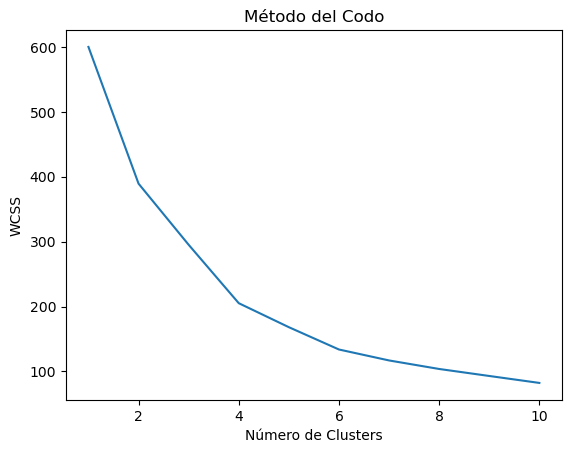

In [94]:
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

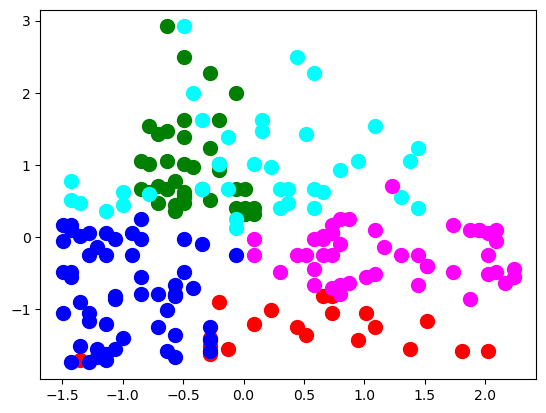

In [98]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')


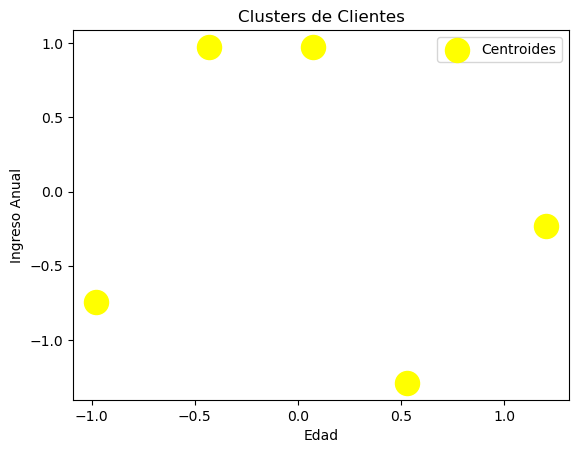

In [102]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroides')

plt.title('Clusters de Clientes')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.legend()
plt.show()

In [106]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

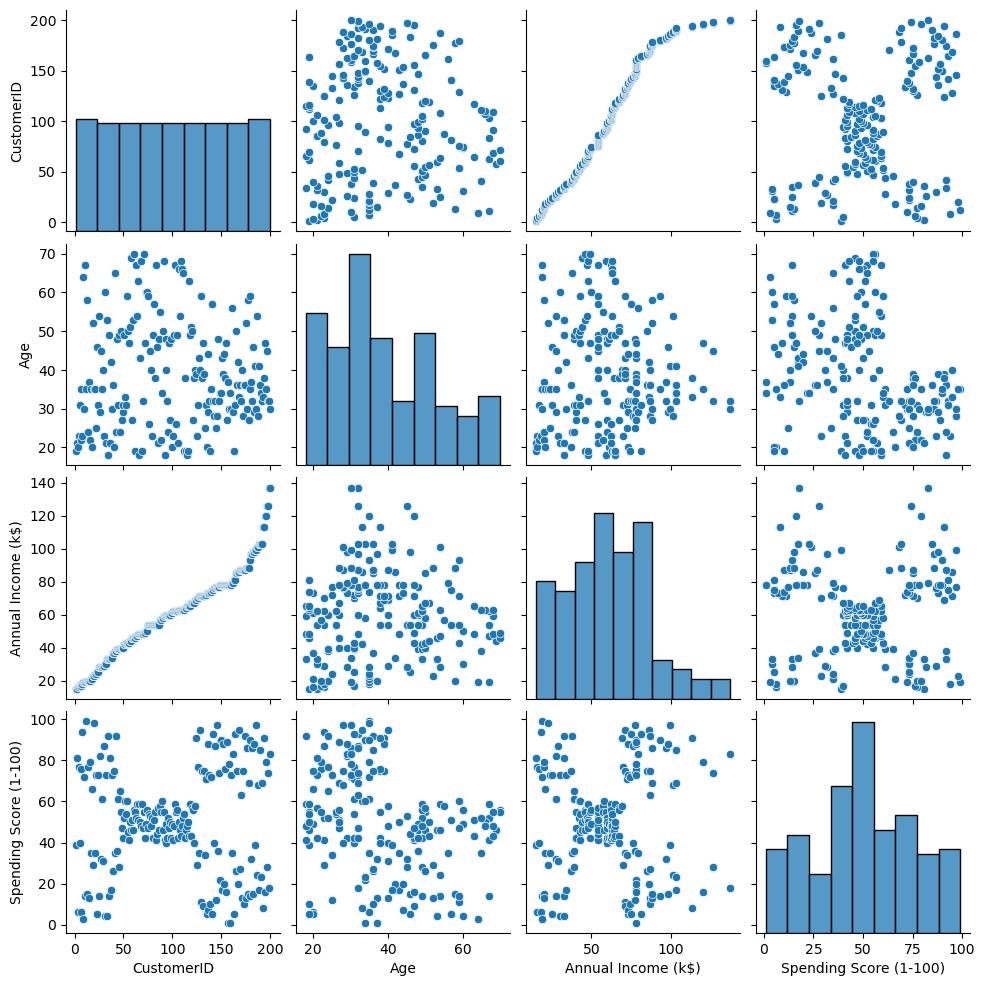

In [112]:
sns.pairplot(Data)  
plt.show()

In [124]:
Data = pd.get_dummies(Data, columns=['Gender'], drop_first=True)

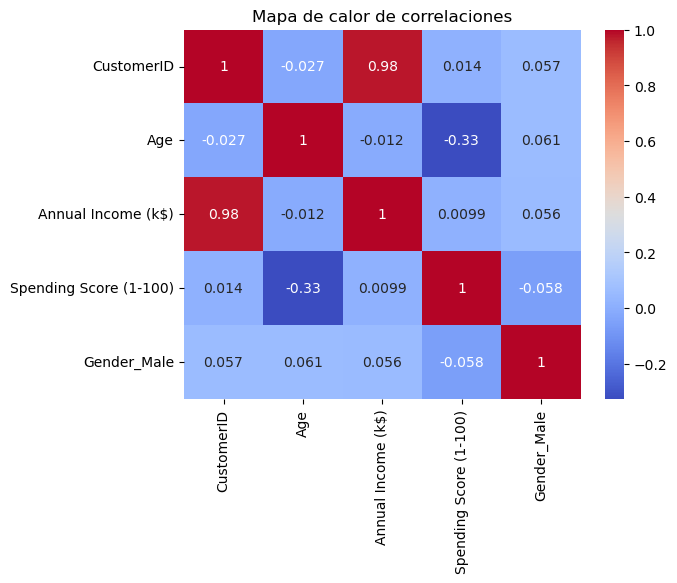

In [130]:
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

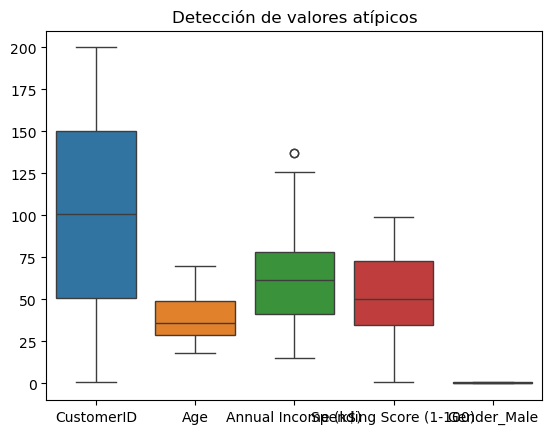

In [132]:
sns.boxplot(data=Data)
plt.title('Detección de valores atípicos')
plt.show()

In [134]:
print(X_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [136]:
from sklearn.decomposition import PCA

In [138]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

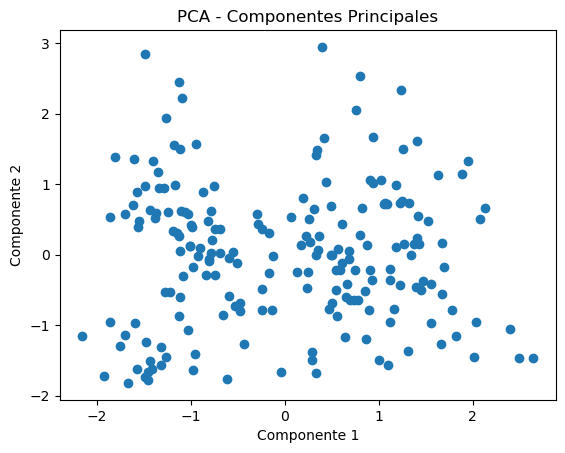

In [140]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA - Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [142]:
from sklearn.cluster import KMeans

In [144]:
n_clusters = 5

In [146]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [148]:
y_kmeans = kmeans.predict(X_scaled)

In [150]:
print(kmeans.cluster_centers_)

[[ 0.5310735  -1.2905084  -1.23646671]
 [-0.98067852 -0.74305983  0.46744035]
 [-0.42880597  0.97484722  1.21608539]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 1.20484056 -0.23577338 -0.05236781]]


In [152]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [154]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.41664341513732767


In [156]:
calinski_score = calinski_harabasz_score(X_scaled, y_kmeans)
print(f'Índice de Calinski-Harabasz: {calinski_score}')

Índice de Calinski-Harabasz: 125.10094020060954


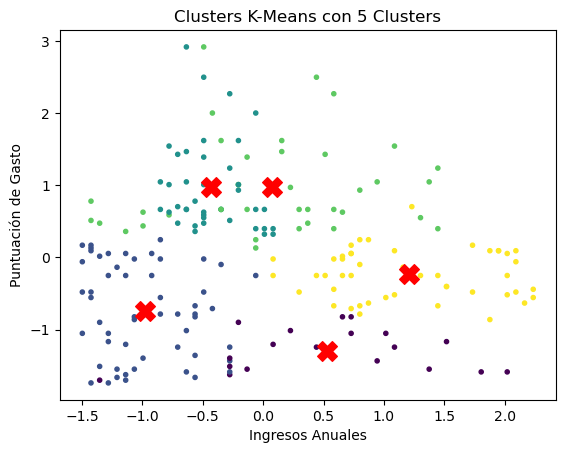

In [158]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', marker='.')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroides
plt.title(f'Clusters K-Means con {n_clusters} Clusters')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuación de Gasto')
plt.show()